## Compare observed precipitation (TRMM and GPCP) with modeled precip in a given basin

In [1]:
import scipy as scipy
import scipy.stats as stats
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
import time 
import xarray as xr
import pickle 
import os

from netCDF4 import Dataset

In [2]:
#Define list of basin names based on key (used in plotting)
basinNames = ['Yukon','Mackenzie','Columbia','Nelson','Mississippi','St-Lawrence','Rhine','Danube','Dniepr','Volga','Ob','Yenisei',\
'Lena','Amur','Orinoco','Parana','Amazonas','Niger','Congo','Nile','Zambezi','Tigris & Euphrates','Indus',\
'Ganges & Brahmaputra','Mekong','Huang-he','Yangtze','Murray & Darling','Don','Fraser','Tocantins','Vuoski & Neva']


In [3]:
#Read in monthly CESM data  
fileBase = '/Users/meganfowler/gp_fuse/Flooding-physiology/RelatedCESMvariables/'

#Read in total precipitation (liq+ice)
fCtrl_prect = xr.open_dataset((fileBase+'cesm1_0_6.1850_prei.1deg.001.cam2.h0.MonthlyRainAndSnow.nc'),decode_times=False) 
fFull_prect = xr.open_dataset((fileBase+'cesm1_0_6.1850_4xco2_fulgb.1deg.002.cam2.h0.MonthlyRainAndSnow.nc'),decode_times=False)
fPhys_prect = xr.open_dataset((fileBase+'cesm1_0_6.1850_4xco2_fixgb.1deg.001.cam2.h0.MonthlyRainAndSnow.nc'),decode_times=False)
fRad_prect  = xr.open_dataset((fileBase+'cesm1_0_6.1850_4xco2_fdbgb.1deg.002.cam2.h0.MonthlyRainAndSnow.nc'),decode_times=False)

ctrlPrect = fCtrl_prect.PRECT     #[m/s]
fullPrect = fFull_prect.PRECT
physPrect = fPhys_prect.PRECT
radPrect  = fRad_prect.PRECT

#CESM lat and lon
cesmLon = fCtrl_prect.lon.values
cesmLat = fCtrl_prect.lat.values


In [4]:
#Read in observed PRECT from TRMM (made by Gabe)

fTRMM = xr.open_dataset('/Users/meganfowler/gp_fuse/Flooding-physiology/TRMM_1.9x2.5_199801-201312.nc')

trmm     = fTRMM.PRECT  #[mm/day]
trmmLon  = fTRMM.lon.values
trmmLat  = fTRMM.lat.values
trmmTime = fTRMM.time    #Can accesss particular field by trmmTime.dt.year, for example


#Read in observed PRECT from GPCP (made by Gabe)
fGPCP = xr.open_dataset('/Users/meganfowler/gp_fuse/Flooding-physiology/GPCP_1.9x2.5_199801-201312.nc')

gpcp     = fGPCP.PRECT #[mm/day]
gpcpLon  = fGPCP.lon.values
gpcpLat  = fGPCP.lat.values
gpcpTime = fGPCP.time


In [5]:
#Average all TRMM on a certain day to get one value per day 

startYr  = trmmTime.dt.year[0]

yrRange = np.asarray(trmmTime.dt.year[-1]-trmmTime.dt.year[0])

avgMonTrmm = np.full([yrRange,12,len(trmmLat),len(trmmLon)],np.nan)
avgMonGpcp = np.full([yrRange,12,len(trmmLat),len(trmmLon)],np.nan)

for iYr in range(yrRange): 
    thisYr = np.asarray(startYr)+iYr   #Define year of interest 
    
    for iMon in range(12): 
        thisMon = iMon+1   #Define month of interest
        
        #Average for TRMM
        iAvg = np.where((trmmTime.dt.year==thisYr) & (trmmTime.dt.month==thisMon))
        avgMonTrmm[iYr,iMon,:,:] = np.nanmean(trmm.values[iAvg][:][:],axis=0)

        #Average for GPCP
        iAvgGPCP = np.where((gpcpTime.dt.year==thisYr) & (gpcpTime.dt.month==thisMon))
        avgMonGpcp[iYr,iMon,:,:] = np.nanmean(gpcp.values[iAvgGPCP][:][:],axis=0)


/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-

/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-

/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/meganfowler/anaconda3/lib/python3.6/site-

/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


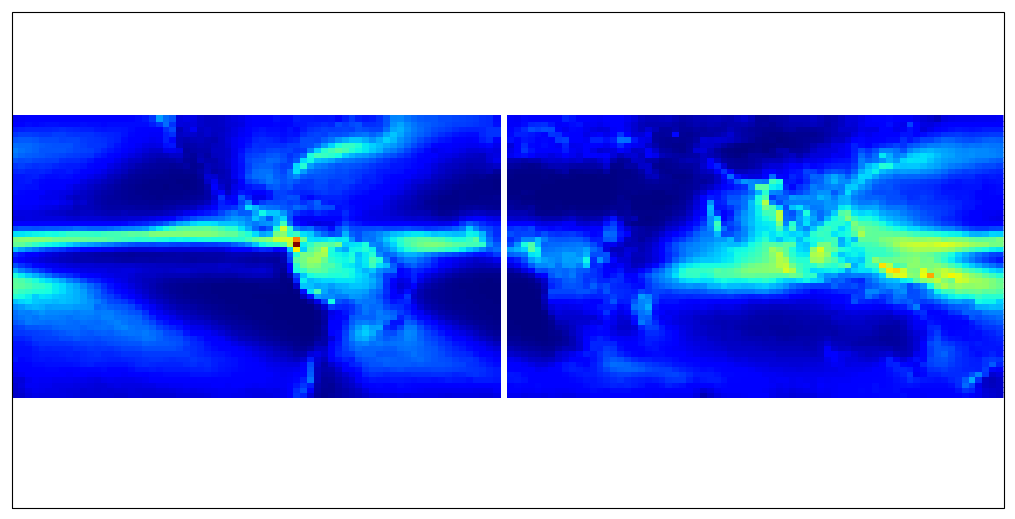

In [7]:
#Plot time average precip (TRMM) to make sure I didn't break anything... 

#Set basic plot options 
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

contour_plot = ax.pcolormesh(trmmLon,trmmLat,np.nanmean(np.nanmean(avgMonTrmm,axis=0),axis=0),cmap='jet',transform=ccrs.PlateCarree())



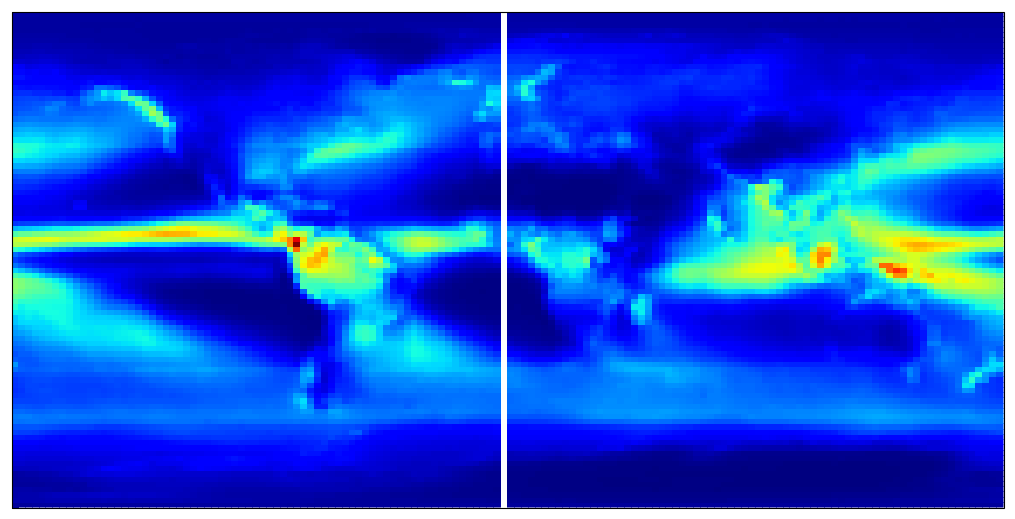

In [8]:
#Plot time average precip (GPCP) to make sure I didn't break anything... 

#Set basic plot options 
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

contour_plot = ax.pcolormesh(gpcpLon,gpcpLat,np.nanmean(np.nanmean(avgMonGpcp,axis=0),axis=0),cmap='jet',transform=ccrs.PlateCarree())




In [9]:
#Read in bsin ID identifiers from Matlab file at TRMM Resolution 
basinData = sio.loadmat('/Users/meganfowler/gp_fuse/Flooding-physiology/MatlabData/BasinMask_TRMMres.mat')
basinMask_TRMM = basinData['basinMaskNew']

#Read in basin ID identifiers from Matlab file at CESM resolution 
basinData      = sio.loadmat('/Users/meganfowler/gp_fuse/Flooding-physiology/MatlabData/BasinMask_CESMres.mat')
basinMask_CESM = basinData['basinMaskNew']

#Read in TRMM areas 
areaData = sio.loadmat('/Users/meganfowler/gp_fuse/Flooding-physiology/MatlabData/TRMMarea.mat')
areaTRMM = areaData['ga']

#Read in CESM grid areas 
fCtrl = xr.open_dataset((fileBase + 'cesm1_0_6.1850_prei.1deg.001.clm2.MonthlyConcat_Meg.nc'),decode_times=False)
cesmArea = fCtrl.area.values



## Average over each basin

*First, average for TRMM*

In [10]:
print('nlon: ',np.shape(trmmLon))
print('mask: ',np.shape(basinMask_TRMM))
print('trmm: ', np.shape(avgMonTrmm))
#print('gpcp: ', np.shape(np.split(gpcp.values)))

nlon:  (144,)
mask:  (144, 96)
trmm:  (15, 12, 96, 144)


In [11]:

basinTRMM  = np.full([len(basinNames),yrRange,12],np.nan)
basinGPCP  = np.full([len(basinNames),yrRange,12],np.nan)

for iB in range(len(basinNames)):
    basinChoice = iB+1
    
    #Define empty arrays (temporary) for each basin
    basinTRMMtemp  = np.full([yrRange,12,len(trmmLat),len(trmmLon)],np.nan)
    basinGPCPtemp  = np.full([yrRange,12,len(trmmLat),len(trmmLon)],np.nan)
    areaTRMMtemp   = np.full([len(trmmLat),len(trmmLon)],np.nan)
    
    for ilon in range(len(trmmLon)):
        for ilat in range(len(trmmLat)):
            if basinMask_TRMM[ilon,ilat]==basinChoice:
                basinTRMMtemp[:,:,ilat,ilon] = avgMonTrmm[:,:,ilat,ilon]
                basinGPCPtemp[:,:,ilat,ilon] = avgMonGpcp[:,:,ilat,ilon]
                areaTRMMtemp[ilat,ilon]      = areaTRMM[ilat,ilon]
    
    #Area weighted averages
    for iYr in range(yrRange):
        for iMon in range(12):
            basinTRMM[iB,iYr,iMon] = np.nansum(np.nansum(areaTRMMtemp*basinTRMMtemp[iYr,iMon,:,:]))/np.nansum(np.nansum(areaTRMMtemp))
            basinGPCP[iB,iYr,iMon] = np.nansum(np.nansum(areaTRMMtemp*basinGPCPtemp[iYr,iMon,:,:]))/np.nansum(np.nansum(areaTRMMtemp))


            

*Average for CESM*

In [12]:
print('nlon: ',np.shape(cesmLon))
print('area: ',np.shape(cesmArea))
print('Precip: ', np.shape(ctrlPrect.values))

nlon:  (288,)
area:  (192, 288)
Precip:  (360, 192, 288)


In [13]:
#Convert from PRECT [m/s] to [mm/day]

ctrlPrectConv = ctrlPrect.values*86400*1000
fullPrectConv = fullPrect.values*86400*1000
physPrectConv = physPrect.values*86400*1000
radPrectConv  = radPrect.values*86400*1000


In [14]:

basinCTRL  = np.full([len(basinNames),30,12],np.nan)
basinFULL  = np.full([len(basinNames),30,12],np.nan)
basinPHYS  = np.full([len(basinNames),30,12],np.nan)
basinRAD   = np.full([len(basinNames),30,12],np.nan)

for iB in range(len(basinNames)):
    basinChoice = iB+1
    
    basinPrecipCtrl_temp = np.full([360,len(cesmLat),len(cesmLon)],np.nan)
    basinPrecipFull_temp = np.full([360,len(cesmLat),len(cesmLon)],np.nan)
    basinPrecipPhys_temp = np.full([360,len(cesmLat),len(cesmLon)],np.nan)
    basinPrecipRad_temp  = np.full([360,len(cesmLat),len(cesmLon)],np.nan)
    areaCESMtemp         = np.full([len(cesmLat),len(cesmLon)],np.nan)
    
    for ilat in range(len(cesmLat)):
        for ilon in range(len(cesmLon)):
            if (basinMask_CESM[ilon,ilat]==basinChoice):

                basinPrecipCtrl_temp[:,ilat,ilon] = ctrlPrectConv[:,ilat,ilon]
                basinPrecipFull_temp[:,ilat,ilon] = fullPrectConv[:,ilat,ilon]
                basinPrecipPhys_temp[:,ilat,ilon] = physPrectConv[:,ilat,ilon]
                basinPrecipRad_temp[:,ilat,ilon]  = radPrectConv[:,ilat,ilon]
                areaCESMtemp[ilat,ilon]           = cesmArea[ilat,ilon]
    
    #Area weighted averages
    basinCtrlAvg = np.full([360],np.nan)
    basinFullAvg = np.full([360],np.nan)
    basinPhysAvg = np.full([360],np.nan)
    basinRadAvg  = np.full([360],np.nan)
    
    for iT in range(360):
        basinCtrlAvg[iT] = np.nansum(np.nansum(areaCESMtemp*basinPrecipCtrl_temp[iT,:,:]))/np.nansum(np.nansum(areaCESMtemp))
        basinFullAvg[iT] = np.nansum(np.nansum(areaCESMtemp*basinPrecipFull_temp[iT,:,:]))/np.nansum(np.nansum(areaCESMtemp))
        basinPhysAvg[iT] = np.nansum(np.nansum(areaCESMtemp*basinPrecipPhys_temp[iT,:,:]))/np.nansum(np.nansum(areaCESMtemp))
        basinRadAvg[iT] = np.nansum(np.nansum(areaCESMtemp*basinPrecipRad_temp[iT,:,:]))/np.nansum(np.nansum(areaCESMtemp))


        basinCTRL[iB,:,:] = np.split(basinCtrlAvg,30)
        basinFULL[iB,:,:] = np.split(basinFullAvg,30)
        basinPHYS[iB,:,:] = np.split(basinPhysAvg,30)
        basinRAD[iB,:,:] = np.split(basinRadAvg,30)
        

*Get mean seasonal cycle and standard error for all datasets*

In [15]:
#Average over all years 
basinTRMMavg = np.nanmean(basinTRMM,axis=1)
basinGPCPavg = np.nanmean(basinGPCP,axis=1)

basinCTRLavg = np.nanmean(basinCTRL,axis=1)
basinFULLavg = np.nanmean(basinFULL,axis=1)
basinPHYSavg = np.nanmean(basinPHYS,axis=1)
basinRADavg = np.nanmean(basinRAD,axis=1)

print(np.shape(basinTRMMavg))

(32, 12)


In [16]:
#Get standard error 
stdCtrl      = np.std(basinCTRL,axis=1)
stdFull      = np.std(basinFULL,axis=1)
stdPhys      = np.std(basinPHYS,axis=1)
stdRad      = np.std(basinRAD,axis=1)
stdTRMM      = np.std(basinTRMM,axis=1)
stdGPCP      = np.std(basinGPCP,axis=1)   #Shape: [32,12]

#Define empty arrays 
errCtrl = np.full([len(basinNames),12],np.nan)
errFull = np.full([len(basinNames),12],np.nan)
errPhys = np.full([len(basinNames),12],np.nan)
errRad  = np.full([len(basinNames),12],np.nan)
errTRMM = np.full([len(basinNames),12],np.nan)
errGPCP = np.full([len(basinNames),12],np.nan)

#Get SE
for iB in range(len(basinNames)):
    errCtrl[iB,:] = stdCtrl[iB,:]/np.sqrt(30)
    errFull[iB,:] = stdFull[iB,:]/np.sqrt(30)
    errPhys[iB,:] = stdPhys[iB,:]/np.sqrt(30)
    errRad[iB,:]  = stdRad[iB,:]/np.sqrt(30)
    errTRMM[iB,:] = stdTRMM[iB,:]/np.sqrt(15)
    errGPCP[iB,:] = stdGPCP[iB,:]/np.sqrt(15)



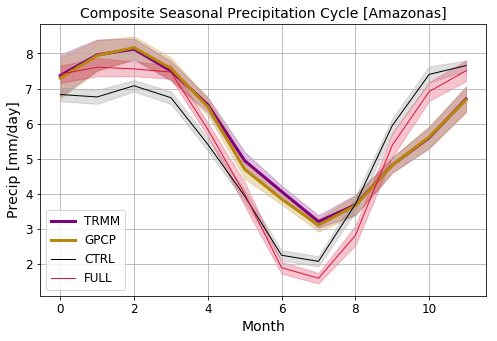

In [17]:
# Plot composite seasonal cycle of precipitation  

iB = 16   #Choose basin

# Look at time series of daily data: 
fig=plt.figure(figsize=(8,5), facecolor='w', edgecolor='k')
my_fontsize = 14

## --- Set axes and size sections --- 
plt.plot(np.arange(12),basinTRMMavg[iB,:],color = 'purple',     label='TRMM',linewidth=3)
plt.plot(np.arange(12),basinGPCPavg[iB,:],color = 'darkgoldenrod', label='GPCP',linewidth=3)
plt.plot(np.arange(12),basinCTRLavg[iB,:],color = 'Black', label='CTRL',linewidth=1)
plt.plot(np.arange(12),basinFULLavg[iB,:],color = 'Crimson',label='FULL',linewidth=1)
# plt.plot(np.arange(12),basinPHYSavg[iB,:],color = 'LimeGreen',label='PHYS',linewidth=1)
# plt.plot(np.arange(12),basinRADavg[iB,:],color = 'DodgerBlue',label='RAD',linewidth=1)

#Add error "bars"
plt.fill_between(np.arange(12),basinTRMMavg[iB,:]-(2*errTRMM[iB,:]),basinTRMMavg[iB,:]+(2*errTRMM[iB,:]),alpha=0.25,color='purple')
plt.fill_between(np.arange(12),basinGPCPavg[iB,:]-(2*errGPCP[iB,:]),basinGPCPavg[iB,:]+(2*errGPCP[iB,:]),alpha=0.25,color='darkgoldenrod')
plt.fill_between(np.arange(12),basinCTRLavg[iB,:]-(2*errCtrl[iB,:]),basinCTRLavg[iB,:]+(2*errCtrl[iB,:]),alpha=0.25,color='grey')
plt.fill_between(np.arange(12),basinFULLavg[iB,:]-(2*errFull[iB,:]),basinFULLavg[iB,:]+(2*errFull[iB,:]),alpha=0.25,color='Crimson')
# plt.fill_between(np.arange(12),basinPHYSavg[iB,:]-(2*errPhys[iB,:]),basinPHYSavg[iB,:]+(2*errPhys[iB,:]),alpha=0.25,color='LimeGreen')
# plt.fill_between(np.arange(12),basinRADavg[iB,:]-(2*errRad[iB,:]),basinRADavg[iB,:]+(2*errRad[iB,:]),alpha=0.25,color='DodgerBlue')


plt.legend(fontsize=12)
plt.title('Composite Seasonal Precipitation Cycle ['+basinNames[iB]+ ']',fontsize=my_fontsize)
plt.xlabel('Month',fontsize=my_fontsize)
plt.ylabel('Precip [mm/day]',fontsize=my_fontsize)
plt.grid()
plt.tick_params(axis='both',labelsize=12)

#Save the image 
# fileName = '/gdata/pritchard2/mdfowler/Flooding-physiology/PythonFigs/BasinStreamflow/PrecipWithObs/'+basinNames[iB]+'_PrecipCycle.jpg'
# fig.savefig(fileName)  #HOW TO SAVE FIGURES 


In [27]:
trmmBias_CTRL = ((basinCTRLavg[iB,:]-basinTRMMavg[iB,:])/basinTRMMavg[iB,:])*100
trmmBias_FULL = ((basinFULLavg[iB,:]-basinTRMMavg[iB,:])/basinTRMMavg[iB,:])*100

gpcpBias_CTRL = ((basinCTRLavg[iB,:]-basinGPCPavg[iB,:])/basinGPCPavg[iB,:])*100
gpcpBias_FULL = ((basinFULLavg[iB,:]-basinGPCPavg[iB,:])/basinGPCPavg[iB,:])*100

print('Mean monthly CTRL bias from TRMM: ', np.nanmean(trmmBias_CTRL), '%')
print('Mean monthly FULL bias from TRMM: ', np.nanmean(trmmBias_FULL), '%')
print()
print('Mean monthly CTRL bias from GPCP: ', np.nanmean(gpcpBias_CTRL), '%')
print('Mean monthly FULL bias from GPCP: ', np.nanmean(gpcpBias_FULL), '%')
print()
print('Monthly biases...')
print()
print('CTRL from TRMM: ', trmmBias_CTRL)
print('FULL from TRMM: ', trmmBias_FULL)
print('CTRL from GPCP: ', gpcpBias_CTRL)
print('FULL from GPCP: ', gpcpBias_FULL)

Mean monthly CTRL bias from TRMM:  -7.750563740782368 %
Mean monthly FULL bias from TRMM:  -10.139862557787952 %

Mean monthly CTRL bias from GPCP:  -6.885361312493031 %
Mean monthly FULL bias from GPCP:  -9.35488821328954 %

Monthly biases...

CTRL from TRMM:  [ -7.37132241 -15.07730554 -12.85205862 -10.19661989 -17.28886671
 -20.46335026 -44.77433353 -35.40030669   0.54738689  23.34887845
  32.30186363  14.2192698 ]
FULL from TRMM:  [  0.5003536   -4.4299744   -6.91455228  -0.47238009 -10.77160109
 -19.24357707 -53.5092767  -50.42594899 -23.69410366  11.74553144
  23.54605842  11.99112013]
CTRL from GPCP:  [ -6.43890819 -14.86063086 -13.34167976 -11.03652753 -16.53609363
 -16.26793144 -41.67311013 -33.29879911   0.99945269  23.40905686
  31.79786385  14.62297151]
FULL from GPCP:  [  1.5120053   -4.18613376  -7.43753197  -1.40323601  -9.95951289
 -14.98381736 -50.89856816 -48.81324406 -23.35102874  11.80004892
  23.07541361  12.38694656]


In [11]:
# Take mean of May-July or May-Augsut values 
# (Block was run after losing data from above, so copy/pasted in the values)
# np.mean([-16.53609363, -16.26793144, -41.67311013, -33.29879911])

## Make supplemental figure (*S12*) of precip bias in all four basins chosen for *Fig. 4*

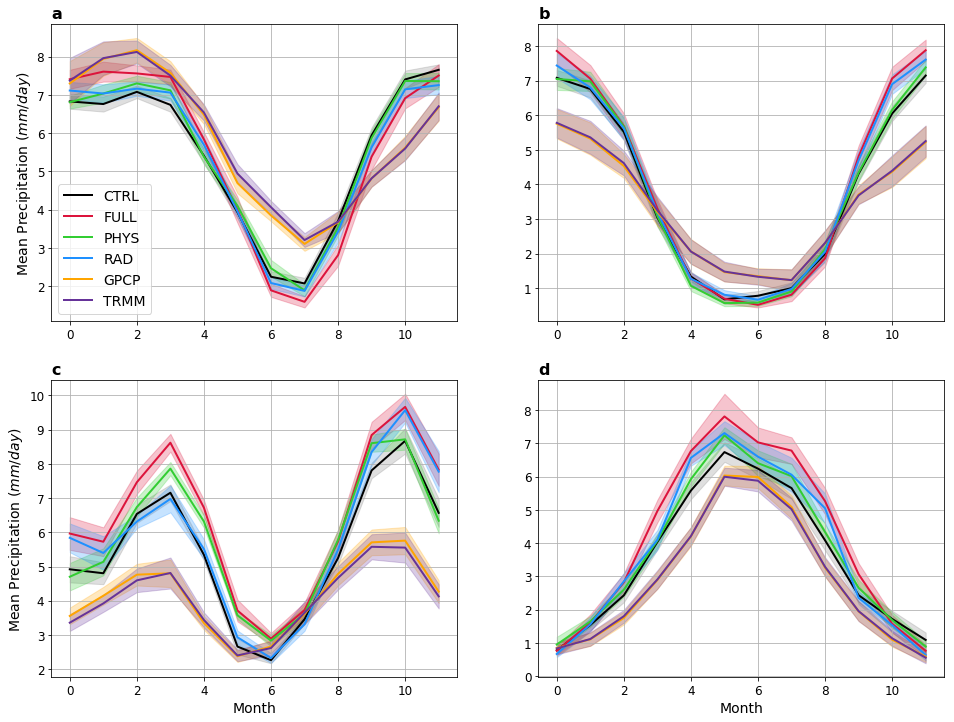

In [43]:
## --- Set up figure window --- 
fig, ax_array = plt.subplots(2,2)
ax1,ax2,ax3,ax4 = ax_array.flatten()
fig.set_size_inches(16,12)
my_fontsize=14

fig.subplots_adjust(wspace=0.1, hspace=0.2)

#Set up axes 
ax1.set_title('a',{'fontweight' :'bold','fontsize':16},loc='left') 
ax2.set_title('b',{'fontweight' :'bold','fontsize':16},loc='left') 
ax3.set_title('c',{'fontweight' :'bold','fontsize':16},loc='left') 
ax4.set_title('d',{'fontweight' :'bold','fontsize':16},loc='left') 


ax3.set_xlabel('Month',fontsize=my_fontsize)
ax4.set_xlabel('Month',fontsize=my_fontsize)
ax1.set_ylabel('Mean Precipitation '+ r'$(mm/day)$',fontsize=my_fontsize)
ax3.set_ylabel('Mean Precipitation '+ r'$(mm/day)$',fontsize=my_fontsize)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
# ax2.set_xticklabels(labels=np.arange(12))
# ax3.set_xticklabels(labels=np.arange(12))
# ax4.set_xticklabels(labels=np.arange(12))
ax1.tick_params(axis='both',labelsize=12)
ax2.tick_params(axis='both',labelsize=12)
ax3.tick_params(axis='both',labelsize=12)
ax4.tick_params(axis='both',labelsize=12)


# PLOT AMAZON #
iB = 16
ax1.plot(np.arange(12),basinCTRLavg[iB,:],color ='Black',label='CTRL',linewidth=2)
ax1.plot(np.arange(12),basinFULLavg[iB,:],color ='Crimson',label='FULL',linewidth=2)
ax1.plot(np.arange(12),basinPHYSavg[iB,:],color = 'LimeGreen',label='PHYS',linewidth=2)
ax1.plot(np.arange(12),basinRADavg[iB,:],color='DodgerBlue',label='RAD',linewidth=2)
ax1.plot(np.arange(12),basinGPCPavg[iB,:],color ='orange',label='GPCP',linewidth=2)
ax1.plot(np.arange(12),basinTRMMavg[iB,:],color ='rebeccapurple',label='TRMM',linewidth=2)
#Add error "bars"
ax1.fill_between(np.arange(12),basinCTRLavg[iB,:]-(2*errCtrl[iB,:]),basinCTRLavg[iB,:]+(2*errCtrl[iB,:]),alpha=0.25,color='Grey')
ax1.fill_between(np.arange(12),basinFULLavg[iB,:]-(2*errFull[iB,:]),basinFULLavg[iB,:]+(2*errFull[iB,:]),alpha=0.25,color='Crimson')
ax1.fill_between(np.arange(12),basinPHYSavg[iB,:]-(2*errPhys[iB,:]),basinPHYSavg[iB,:]+(2*errPhys[iB,:]),alpha=0.25,color='LimeGreen')
ax1.fill_between(np.arange(12),basinRADavg[iB,:]-(2*errRad[iB,:]),basinRADavg[iB,:]+(2*errRad[iB,:]),alpha=0.25,color='DodgerBlue')
ax1.fill_between(np.arange(12),basinGPCPavg[iB,:]-(2*errGPCP[iB,:]),basinGPCPavg[iB,:]+(2*errGPCP[iB,:]),alpha=0.25,color='orange')
ax1.fill_between(np.arange(12),basinTRMMavg[iB,:]-(2*errTRMM[iB,:]),basinTRMMavg[iB,:]+(2*errTRMM[iB,:]),alpha=0.25,color='rebeccapurple')
#Legend
ax1.legend(fontsize=14)
# ------------------------------------


# # PLOT PARANA # 
iB = 15
ax2.plot(np.arange(12),basinCTRLavg[iB,:],color ='Black',label='CTRL',linewidth=2)
ax2.plot(np.arange(12),basinFULLavg[iB,:],color ='Crimson',label='FULL',linewidth=2)
ax2.plot(np.arange(12),basinPHYSavg[iB,:],color = 'LimeGreen',label='PHYS',linewidth=2)
ax2.plot(np.arange(12),basinRADavg[iB,:],color='DodgerBlue',label='RAD',linewidth=2)
ax2.plot(np.arange(12),basinGPCPavg[iB,:],color ='orange',label='GPCP',linewidth=2)
ax2.plot(np.arange(12),basinTRMMavg[iB,:],color ='rebeccapurple',label='TRMM',linewidth=2)
#Add error "bars"
ax2.fill_between(np.arange(12),basinCTRLavg[iB,:]-(2*errCtrl[iB,:]),basinCTRLavg[iB,:]+(2*errCtrl[iB,:]),alpha=0.25,color='Grey')
ax2.fill_between(np.arange(12),basinFULLavg[iB,:]-(2*errFull[iB,:]),basinFULLavg[iB,:]+(2*errFull[iB,:]),alpha=0.25,color='Crimson')
ax2.fill_between(np.arange(12),basinPHYSavg[iB,:]-(2*errPhys[iB,:]),basinPHYSavg[iB,:]+(2*errPhys[iB,:]),alpha=0.25,color='LimeGreen')
ax2.fill_between(np.arange(12),basinRADavg[iB,:]-(2*errRad[iB,:]),basinRADavg[iB,:]+(2*errRad[iB,:]),alpha=0.25,color='DodgerBlue')
ax2.fill_between(np.arange(12),basinGPCPavg[iB,:]-(2*errGPCP[iB,:]),basinGPCPavg[iB,:]+(2*errGPCP[iB,:]),alpha=0.25,color='orange')
ax2.fill_between(np.arange(12),basinTRMMavg[iB,:]-(2*errTRMM[iB,:]),basinTRMMavg[iB,:]+(2*errTRMM[iB,:]),alpha=0.25,color='rebeccapurple')
# ------------------------------------

# # PLOT CONGO #
iB = 18
ax3.plot(np.arange(12),basinCTRLavg[iB,:],color ='Black',label='CTRL',linewidth=2)
ax3.plot(np.arange(12),basinFULLavg[iB,:],color ='Crimson',label='FULL',linewidth=2)
ax3.plot(np.arange(12),basinPHYSavg[iB,:],color = 'LimeGreen',label='PHYS',linewidth=2)
ax3.plot(np.arange(12),basinRADavg[iB,:],color='DodgerBlue',label='RAD',linewidth=2)
ax3.plot(np.arange(12),basinGPCPavg[iB,:],color ='orange',label='GPCP',linewidth=2)
ax3.plot(np.arange(12),basinTRMMavg[iB,:],color ='rebeccapurple',label='TRMM',linewidth=2)
#Add error "bars"
ax3.fill_between(np.arange(12),basinCTRLavg[iB,:]-(2*errCtrl[iB,:]),basinCTRLavg[iB,:]+(2*errCtrl[iB,:]),alpha=0.25,color='Grey')
ax3.fill_between(np.arange(12),basinFULLavg[iB,:]-(2*errFull[iB,:]),basinFULLavg[iB,:]+(2*errFull[iB,:]),alpha=0.25,color='Crimson')
ax3.fill_between(np.arange(12),basinPHYSavg[iB,:]-(2*errPhys[iB,:]),basinPHYSavg[iB,:]+(2*errPhys[iB,:]),alpha=0.25,color='LimeGreen')
ax3.fill_between(np.arange(12),basinRADavg[iB,:]-(2*errRad[iB,:]),basinRADavg[iB,:]+(2*errRad[iB,:]),alpha=0.25,color='DodgerBlue')
ax3.fill_between(np.arange(12),basinGPCPavg[iB,:]-(2*errGPCP[iB,:]),basinGPCPavg[iB,:]+(2*errGPCP[iB,:]),alpha=0.25,color='orange')
ax3.fill_between(np.arange(12),basinTRMMavg[iB,:]-(2*errTRMM[iB,:]),basinTRMMavg[iB,:]+(2*errTRMM[iB,:]),alpha=0.25,color='rebeccapurple')
# # ------------------------------------

# # PLOT YANGTZE #
iB = 26
ax4.plot(np.arange(12),basinCTRLavg[iB,:],color ='Black',label='CTRL',linewidth=2)
ax4.plot(np.arange(12),basinFULLavg[iB,:],color ='Crimson',label='FULL',linewidth=2)
ax4.plot(np.arange(12),basinPHYSavg[iB,:],color = 'LimeGreen',label='PHYS',linewidth=2)
ax4.plot(np.arange(12),basinRADavg[iB,:],color='DodgerBlue',label='RAD',linewidth=2)
ax4.plot(np.arange(12),basinGPCPavg[iB,:],color ='orange',label='GPCP',linewidth=2)
ax4.plot(np.arange(12),basinTRMMavg[iB,:],color ='rebeccapurple',label='TRMM',linewidth=2)
#Add error "bars"
ax4.fill_between(np.arange(12),basinCTRLavg[iB,:]-(2*errCtrl[iB,:]),basinCTRLavg[iB,:]+(2*errCtrl[iB,:]),alpha=0.25,color='Grey')
ax4.fill_between(np.arange(12),basinFULLavg[iB,:]-(2*errFull[iB,:]),basinFULLavg[iB,:]+(2*errFull[iB,:]),alpha=0.25,color='Crimson')
ax4.fill_between(np.arange(12),basinPHYSavg[iB,:]-(2*errPhys[iB,:]),basinPHYSavg[iB,:]+(2*errPhys[iB,:]),alpha=0.25,color='LimeGreen')
ax4.fill_between(np.arange(12),basinRADavg[iB,:]-(2*errRad[iB,:]),basinRADavg[iB,:]+(2*errRad[iB,:]),alpha=0.25,color='DodgerBlue')
ax4.fill_between(np.arange(12),basinGPCPavg[iB,:]-(2*errGPCP[iB,:]),basinGPCPavg[iB,:]+(2*errGPCP[iB,:]),alpha=0.25,color='orange')
ax4.fill_between(np.arange(12),basinTRMMavg[iB,:]-(2*errTRMM[iB,:]),basinTRMMavg[iB,:]+(2*errTRMM[iB,:]),alpha=0.25,color='rebeccapurple')

# # ------------------------------------


fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig.savefig('/Users/meganfowler/Documents/Irvine/Flooding/Physiology/Illustrator/SupplementFigure_PrecipObs.pdf',bbox_inches = 'tight')  #Save figure as pdf

